In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

# Train & Test with One-Feature Linear Regression Model

In [2]:
df_one_var = pd.read_csv(r'C:\Users\jorda\Documents\studies\DScourse\CourseMaterials\Pandas\data\health_data.csv')

### Train / Test Data Split

In [3]:
train_df = df_one_var.sample(frac=2/3, random_state=42)
train_df_index = train_df.index
test_df = df_one_var.loc[~df_one_var.index.isin(train_df_index)]

In [4]:
train_df.shape, test_df.shape

((338, 3), (169, 3))

Making sure there is no overlap between the train and test sets.

In [5]:
test_df.index.isin(train_df_index).sum()

0

### Model Training

In [6]:
one_var_model = LinearRegression()

one_var_model.fit(train_df[['weight']], train_df[['height']])
print(f"Intercept: {one_var_model.intercept_[0]}, Coefficient: {one_var_model.coef_[0][0]}")

Intercept: 135.71549727196555, Coefficient: 0.5118680110690217


### Model Prediction

In [7]:
test_df['predicted_height'] = one_var_model.predict(test_df[['weight']])
train_df['predicted_height'] = one_var_model.predict(train_df[['weight']])

C:\Users\jorda\AppData\Local\Temp\ipykernel_20088\4218918061.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['predicted_height'] = one_var_model.predict(test_df[['weight']])


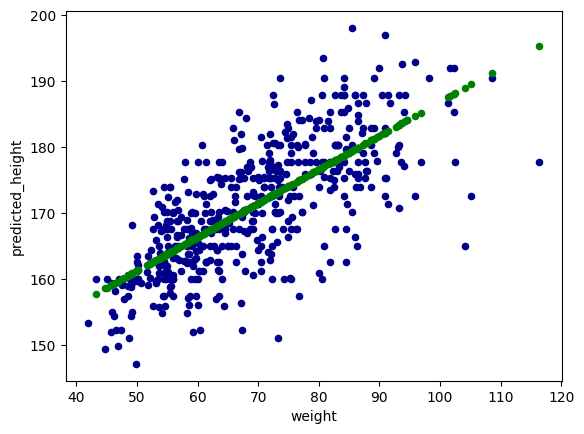

In [8]:
ax = df_one_var.plot.scatter(x='weight', y='height', color='DarkBlue')
train_ax = train_df.plot.scatter(x='weight', y='predicted_height', color='Green', ax=ax)

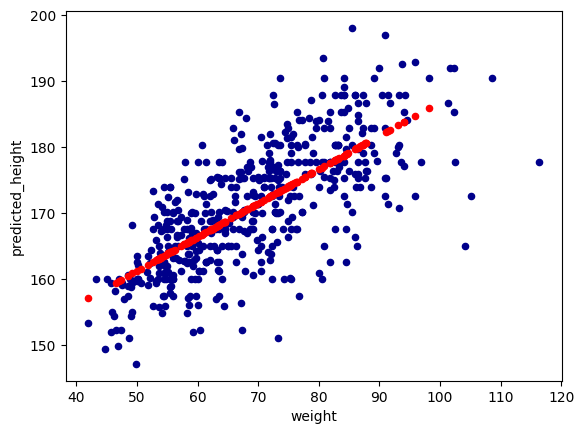

In [9]:
ax = df_one_var.plot.scatter(x='weight', y='height', color='DarkBlue')
ax = test_df.plot.scatter(x='weight', y='predicted_height', color='Red', ax=ax)

### Model Errors

In [10]:
test_df['error'] = (test_df['height'] - test_df['predicted_height'])
train_df['error'] = (train_df['height'] - train_df['predicted_height'])
test_error = test_df['error'].abs().mean()
train_error = train_df['error'].abs().mean()
print(f"Test error: {round(test_error, 3)}")
print(f"Train error: {round(train_error, 3)}")


Test error: 5.166
Train error: 5.112


C:\Users\jorda\AppData\Local\Temp\ipykernel_20088\896845352.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['error'] = (test_df['height'] - test_df['predicted_height'])


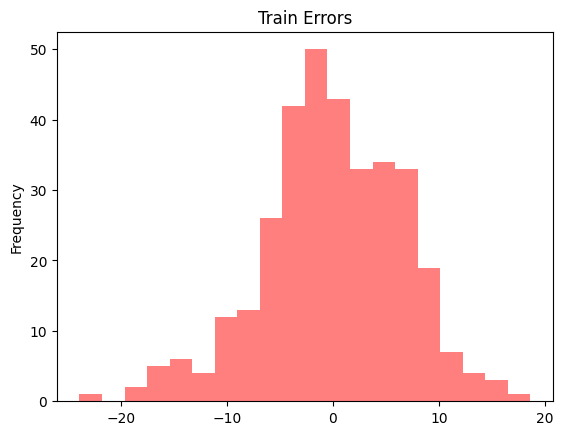

In [11]:
train_error_ax = train_df['error'].plot.hist(bins=20, title='Train Errors', alpha=0.5, color='red')

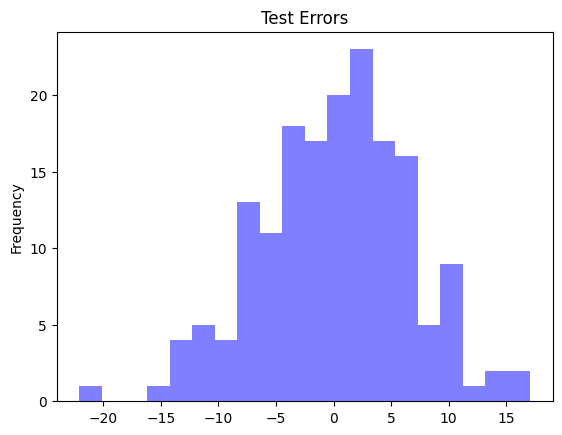

In [12]:
test_error_ax = test_df['error'].plot.hist(bins=20, title='Test Errors', alpha=0.5, color='blue')

# Train & Test with Two-Feature Linear Regression Model

In [13]:
df_two_vars = pd.read_csv(r'C:\Users\jorda\Documents\studies\DScourse\CourseMaterials\Pandas\data\health_data.csv')

### Train / Test Data Split

In [14]:
train_df, test_df = train_test_split(df_two_vars, test_size=1/3, random_state=100)

In [15]:
train_df.shape, test_df.shape

((338, 3), (169, 3))

### Model Training

In [16]:
two_var_model = LinearRegression()
two_var_model.fit(train_df[['weight', 'gender']], train_df[['height']])
print(f"Intercept: {two_var_model.intercept_[0]}, Coefficients: {two_var_model.coef_[0][0]}, {two_var_model.coef_[0][1]}")

Intercept: 144.43229817245464, Coefficients: 0.32647396921844757, 7.848903096961115


### Model Prediction

In [17]:
train_df['predicted_height'] = two_var_model.predict(train_df[['weight', 'gender']])
test_df['predicted_height'] = two_var_model.predict(test_df[['weight', 'gender']])

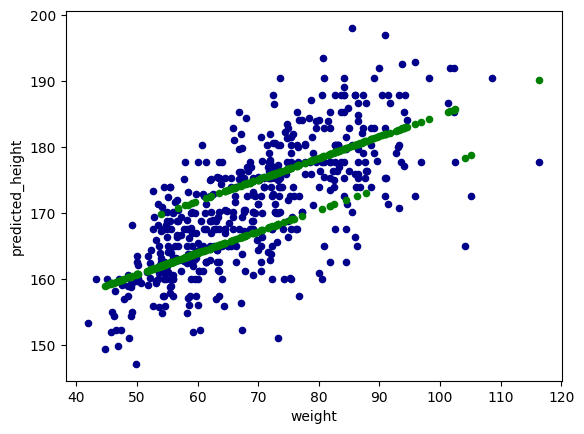

In [18]:
ax = df_two_vars.plot.scatter(x='weight', y='height', color='DarkBlue')
train_ax = train_df.plot.scatter(x='weight', y='predicted_height', color='Green', ax=ax)

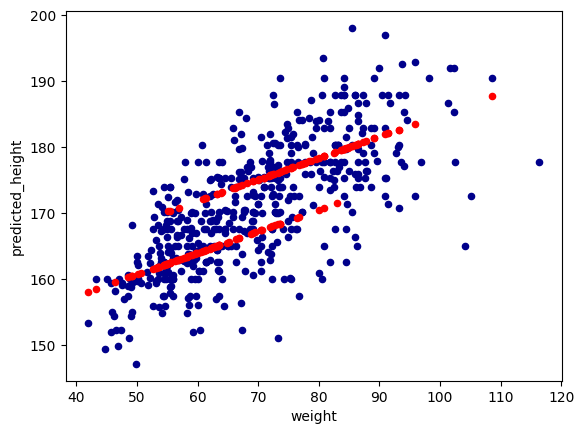

In [19]:
ax = df_two_vars.plot.scatter(x='weight', y='height', color='DarkBlue')
ax = test_df.plot.scatter(x='weight', y='predicted_height', color='Red', ax=ax)

### Model Errors

In [20]:
train_df['error'] = (train_df['height'] - train_df['predicted_height'])
test_df['error'] = (test_df['height'] - test_df['predicted_height'])
train_error = train_df['error'].abs().mean()
test_error = test_df['error'].abs().mean()
print(f"Train error: {train_error}")
print(f"Test error: {test_error}")

Train error: 4.668310314550152
Test error: 5.027125683528571


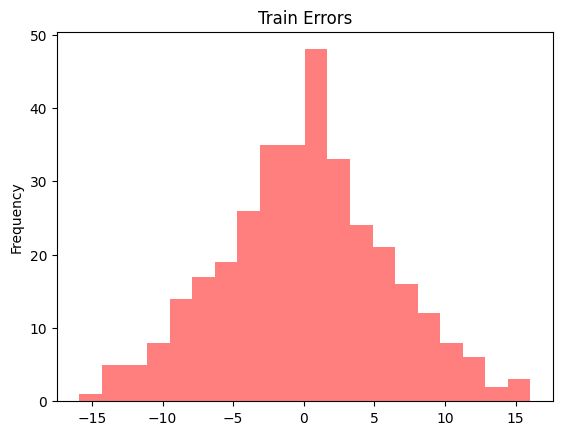

In [21]:
train_error_ax = train_df['error'].plot.hist(bins=20, title='Train Errors', alpha=0.5, color='red')

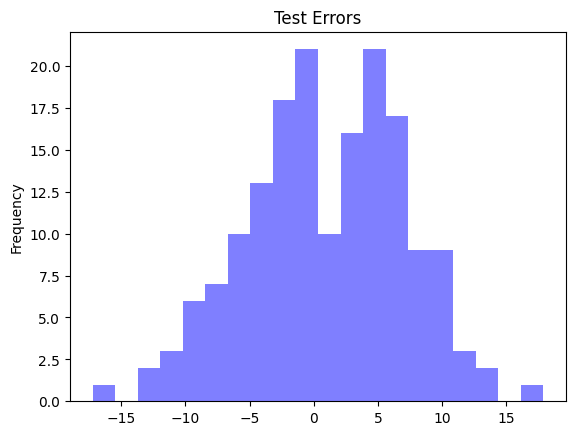

In [22]:
test_error_ax = test_df['error'].plot.hist(bins=20, title='Test Errors', alpha=0.5, color='blue')